In [23]:
import pandas as pd
import os 
import random
import subprocess

import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pickle
from matplotlib import gridspec
import seaborn as sns
from statsmodels.stats.multitest import multipletests


In [ ]:

dict_blocks = '../key_files/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

In [10]:
maf = pd.read_csv('../key_files/maf_all_samples_last_gen.csv')

In [11]:
maf.columns = ['MAF']

In [12]:
wd = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen/lfmm_fullresults_all_k/'

In [13]:
pwd - P

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/wza_last_gen'

In [24]:
sns.set_context("talk")

In [6]:
biovars = [
 'bio2',
 'bio3',
 'bio4',
 'bio5',
 'bio6',
 'bio7',
 'bio8',
 'bio9',
 'bio10',
 'bio11',
 'bio13',
 'bio14',
 'bio15',
 'bio16',
 'bio17',
 'bio19']

In [15]:
for biovar in biovars:
    lfmm = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen/lfmm_fullresults_all_k/lfmm_{biovar}_k16_results.csv'
    
    lfmm = pd.read_csv(lfmm)
    
    lfmm = pd.concat([lfmm, maf['MAF']],axis=1)
    
    lfmm.to_csv(F'lfmm_{biovar}_results_all_samples_k16_wmaf.csv',index=None)

In [16]:
path = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/wza_last_gen/'

In [17]:
## create a dir 
# create sbatch files to submit on cedar server
shfiles = []
for biovar in biovars:
    seed = random.randint(1,100000000)
    file = f'wza_{biovar}.sh'
    cmd = f'python general_WZA_script_mod_polynomial_order7.py \
            --correlations lfmm_{biovar}_results_all_samples_k16_wmaf.csv \
            --summary_stat p_value \
            --window block \
            --output wza_results_lfmm_{biovar}_poly7.csv \
            --sep ","'
    text = f'''#!/bin/bash
#SBATCH --job-name=wza_{biovar}
#SBATCH --time=1:00:00  # Time limit set to 4 days
#SBATCH --ntasks=1
#SBATCH --mem-per-cpu=30gb
#SBATCH --output=wza_%j_{biovar}.out
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

module load python/3.11_conda
conda activate /home/tbellagio/miniforge3/envs/pipeline_snakemake
export LD_LIBRARY_PATH="/home/tbellagio/miniforge3/envs/run_baypass/lib:$LD_LIBRARY_PATH"
cd /carnegie/nobackup/scratch/tbellagio/gea_grene-net/wza_last_gen
{cmd}


'''
    with open(file, 'w') as o:
        o.write("%s" % text)
    shfiles.append(file)

In [18]:
shfiles

['wza_bio2.sh',
 'wza_bio3.sh',
 'wza_bio4.sh',
 'wza_bio5.sh',
 'wza_bio6.sh',
 'wza_bio7.sh',
 'wza_bio8.sh',
 'wza_bio9.sh',
 'wza_bio10.sh',
 'wza_bio11.sh',
 'wza_bio13.sh',
 'wza_bio14.sh',
 'wza_bio15.sh',
 'wza_bio16.sh',
 'wza_bio17.sh',
 'wza_bio19.sh']

In [19]:
## now run the shfiles
for shfile in shfiles:
    # Submit each sbatch script to the SLURM scheduler
    subprocess.run(["sbatch", shfile], check=True)

Submitted batch job 61794
Submitted batch job 61795
Submitted batch job 61796
Submitted batch job 61797
Submitted batch job 61798
Submitted batch job 61799
Submitted batch job 61800
Submitted batch job 61801
Submitted batch job 61802
Submitted batch job 61803
Submitted batch job 61804
Submitted batch job 61805
Submitted batch job 61806
Submitted batch job 61807
Submitted batch job 61808
Submitted batch job 61809


In [ ]:
biovar = 'bio15'

In [21]:
wza_lfmm = pd.read_csv(f'wza_results_lfmm_{biovar}_poly7.csv')

/tmp/ipykernel_1924683/2317346637.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


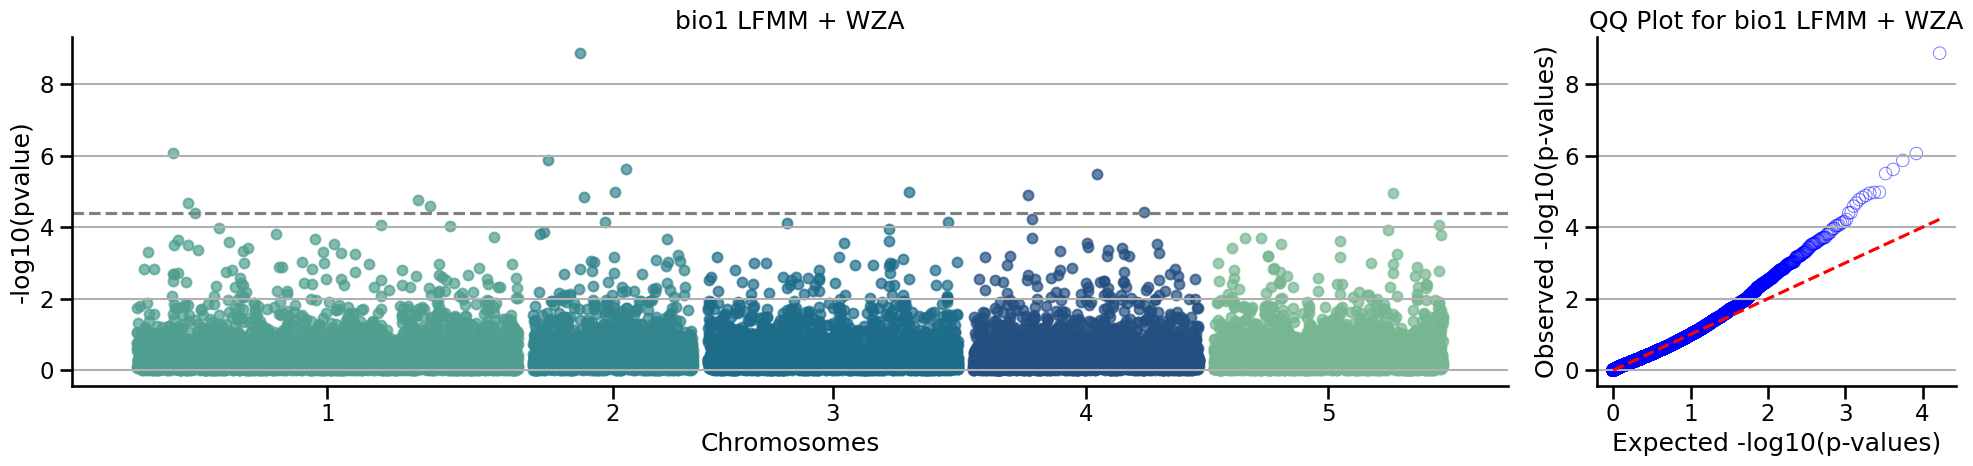

/tmp/ipykernel_1924683/2317346637.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


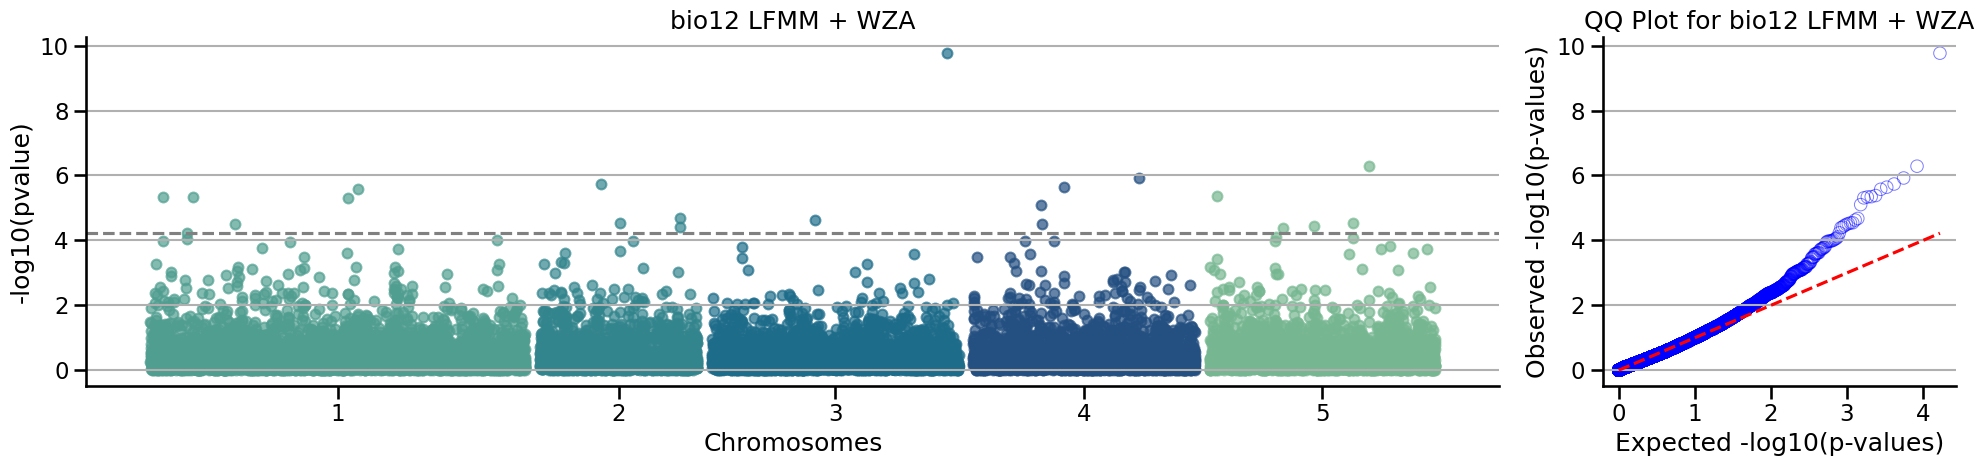

/tmp/ipykernel_1924683/2317346637.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(


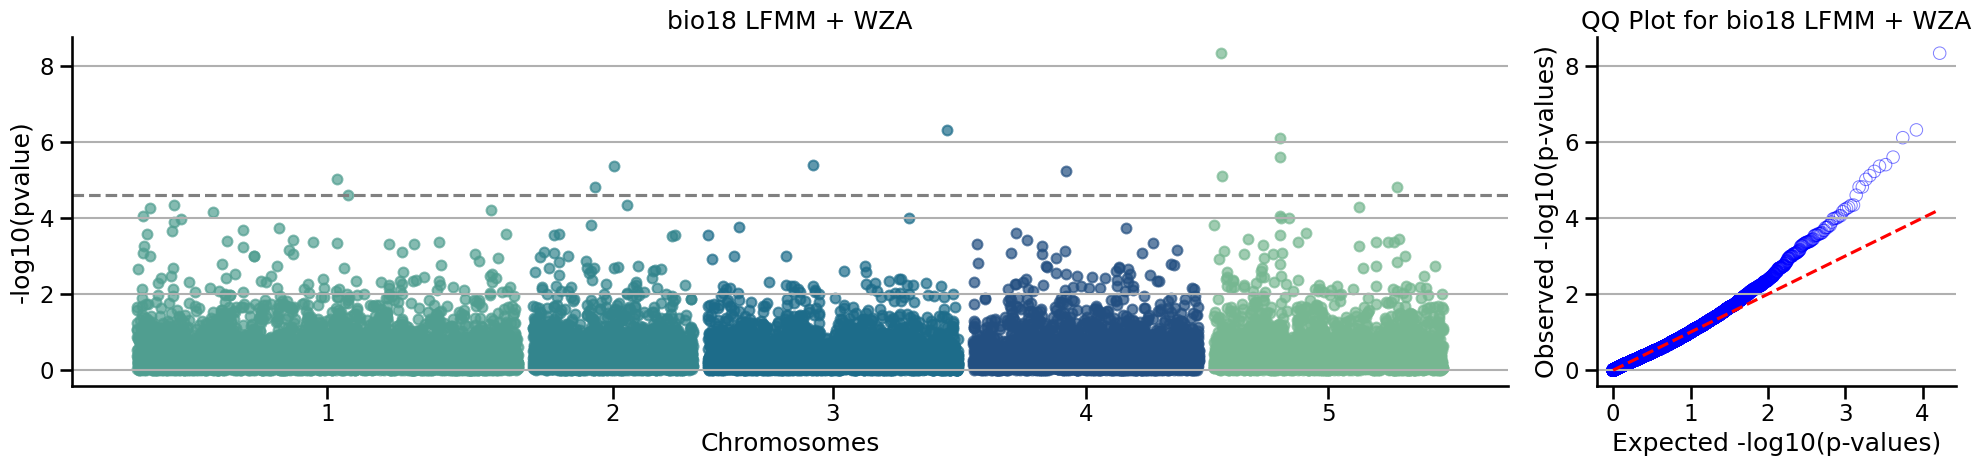

In [26]:
for biovar in ['bio1', 'bio12', 'bio18']:
    wza = pd.read_csv(f'wza_results_lfmm_{biovar}_poly7.csv')

    wza['chrom'] = wza['gene'].str.split('_').str[0].astype(int)
    wza['pos'] = wza['gene'].str.split('_').str[1].astype(int)
    # Assuming 'wza' and 'biovar' are defined and properly set up as needed for your plots
    # Data preparation and calculations
    observed_quantiles = -np.log10(np.sort(wza['Z_pVal'].values))
    expected_quantiles = -np.log10(np.linspace(1 / len(wza), 1, len(wza)))
    #threshold_value = 0.05 / len(wza)
    # Apply Benjamini-Hochberg correction and find critical p-value
    _, adjusted_pvals, _, _ = multipletests(wza['Z_pVal'], alpha=0.05, method='fdr_bh')
    wza['adjusted_pval'] = adjusted_pvals

    # Find the largest raw p-value that corresponds to an adjusted p-value less than or equal to the FDR threshold
    critical_pvalue = wza.loc[wza['adjusted_pval'] <= 0.05, 'Z_pVal'].max()
    #significance_line = all[all['Bonferroni_corrected_pval'] < 0.05]['-log10(pvalue)'].min()
    # DataFrame setup for the Manhattan plot
    df = wza[['Z_pVal', 'pos', 'chrom']].copy()
    df['chromosome'] = df['chrom']
    df['position'] = df['pos']
    df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])
    
    # Color setup
    colors = sns.color_palette("crest", n_colors=5)
    
    # Calculate chromosome offsets as before
    chromosome_offsets = {}
    offset = 0
    chrom_ends = {}
    for chrom in sorted(wza['chrom'].unique()):
        chromosome_offsets[chrom] = offset
        max_position = wza[wza['chrom'] == chrom]['pos'].max()
        offset += max_position + 200
        chrom_ends[offset] = (chrom, max_position)
    
    # Plotting as before
    # ...
    df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
    
    # Create a figure with custom subplot widths
    fig = plt.figure(figsize=(20, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])  # 80% to 20% width ratio
    
    # Manhattan plot on the first subplot
    ax1 = plt.subplot(gs[0])
    for chrom in sorted(df['chromosome'].unique()):
        subset = df[df['chromosome'] == chrom]
        ax1.scatter(
            subset['adjusted_position'],
            subset['-log10(pvalue)'],
            alpha=0.7,
            c=colors[chrom % len(colors)],
            s=50
        )
    
    ax1.set_xlabel('Chromosomes')
    ax1.set_ylabel('-log10(pvalue)')
    ax1.set_title(f'{biovar} LFMM + WZA')

    ax1.axhline(y=-np.log10(critical_pvalue), color='grey', linestyle='dashed')

    #ax1.axhline(y=-np.log10(threshold_value), color='grey', linestyle='dashed')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.grid(axis='y')
    
    # QQ plot on the second subplot
    ax2 = plt.subplot(gs[1])
    sns.scatterplot(x=expected_quantiles, y=observed_quantiles, edgecolor='b', facecolor='none', alpha=0.5, ax=ax2)
    ax2.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], 'r--')
    ax2.set_xlabel("Expected -log10(p-values)")
    ax2.set_ylabel("Observed -log10(p-values)")
    ax2.set_title(f'QQ Plot for {biovar} LFMM + WZA')
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.grid(axis='y')
        
    # Custom function to determine actual genomic positions from adjusted positions
    def get_original_position(adjusted_pos):
        for end in sorted(chrom_ends.keys()):
            if adjusted_pos <= end:
                chrom, max_pos = chrom_ends[end]
                return f"{chrom}"
        return ""
    
    # Setting the ticks on the Manhattan plot to show actual genomic positions
    ax1.set_xticks([chromosome_offsets[chrom] + wza[wza['chrom'] == chrom]['pos'].max()/2 for chrom in sorted(wza['chrom'].unique())])  # Set ticks at the middle of each chromosome segment
    ax1.set_xticklabels([get_original_position(chromosome_offsets[chrom] + wza[wza['chrom'] == chrom]['pos'].max()/2) for chrom in sorted(wza['chrom'].unique())],)  # Use the function to get original positions as labels
    
    plt.tight_layout()
    plt.savefig(f'last_gen_{biovar}_LFMMWZA.png')
    plt.show()

/tmp/ipykernel_1115480/1157682267.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


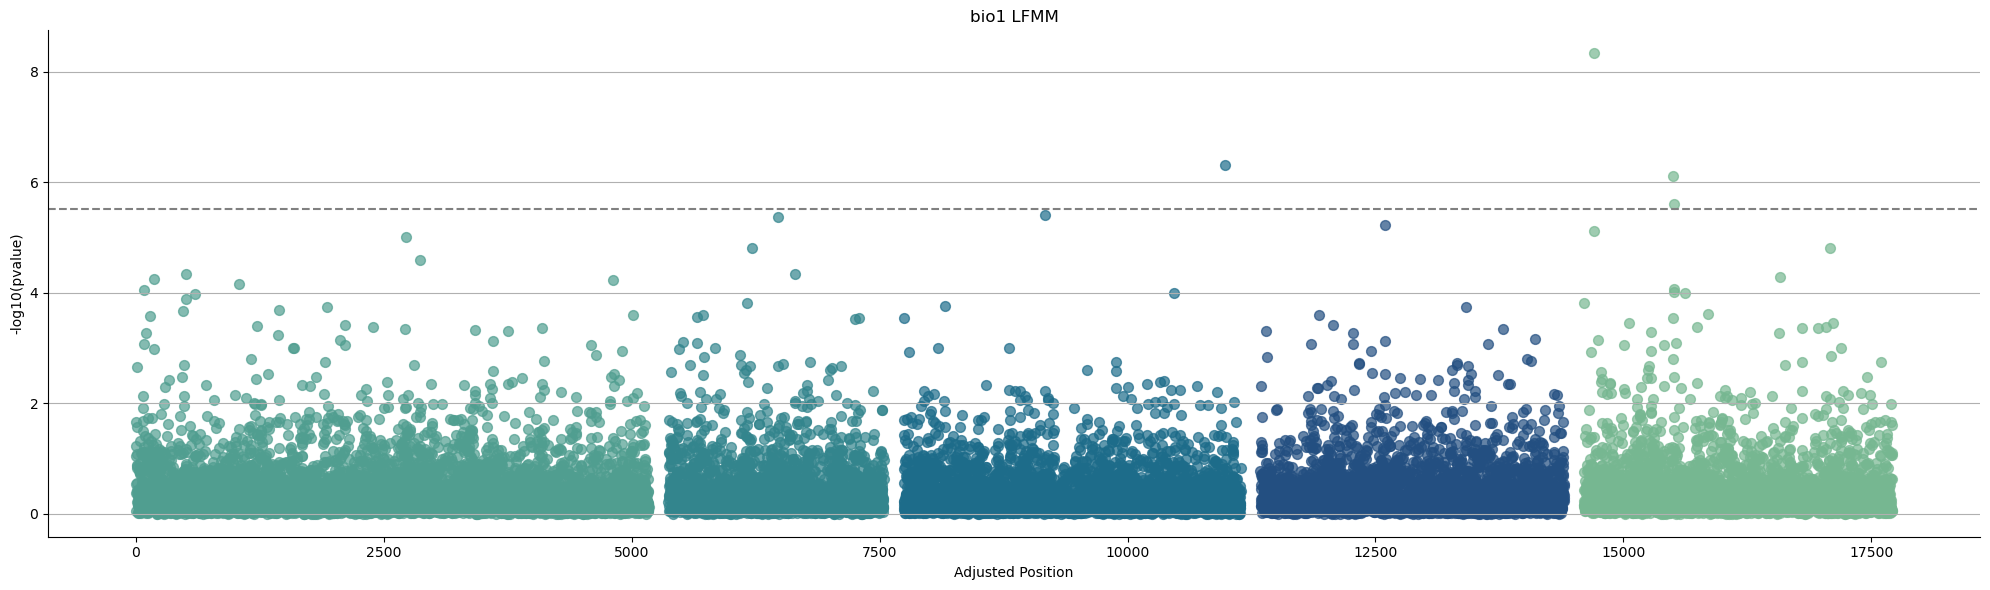

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Significance threshold
threshold_value = 0.05 / len(wza_lfmm)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Define colors for each chromosome
colors = sns.color_palette("crest", n_colors=5)

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7, 
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
        s=50
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} LFMM')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(axis='y')

# Add a threshold line for significance
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Identify significant blocks in wza_lfmm
significant_blocks = df[df['-log10(pvalue)'] >= threshold]




plt.tight_layout()
plt.savefig(f'manhattan_{biovar}_lfmm.pdf')
plt.savefig(f'manhattan_{biovar}_lfmm.png',dpi=600)
plt.show()

In [ ]:
19424944 - 19425928

In [ ]:

# Highlight specific genes if needed
genes = ['2_1265']  # List of specific genes to highlight
for gene in g19424944 - 19425928enes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',
            linewidth=2,
            facecolor='none',
            s=100,
            label=f'Gene {gene}'
        )


/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_4164990/690161181.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


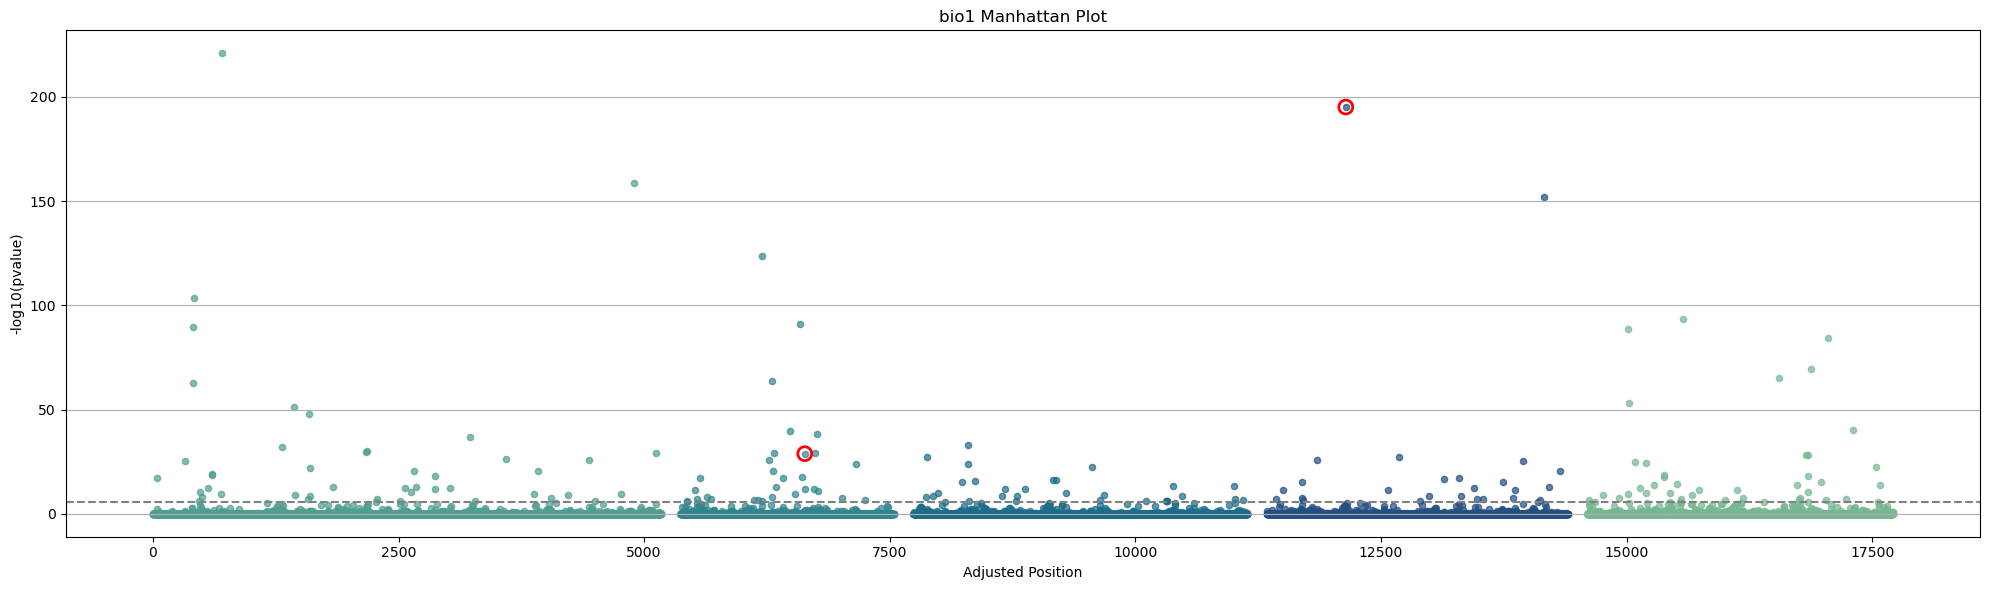

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Significance threshold
threshold_value = 0.05 / len(wza_lfmm)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df = wza_lfmm[['top_candidate_p', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['top_candidate_p'])

# Define colors for each chromosome
colors = sns.color_palette("crest", n_colors=5)

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7, 
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
        s=20
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')
plt.grid(axis='y')

# Add a threshold line for significance
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Identify significant blocks in wza_lfmm
significant_blocks = df[df['-log10(pvalue)'] >= threshold]


# Highlight specific genes if needed
genes = ['2_1265', '4_801']  # List of specific genes to highlight
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',
            linewidth=2,
            facecolor='none',
            s=100,
            label=f'Gene {gene}'
        )

plt.tight_layout()
plt.show()

/tmp/ipykernel_3972733/450657511.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


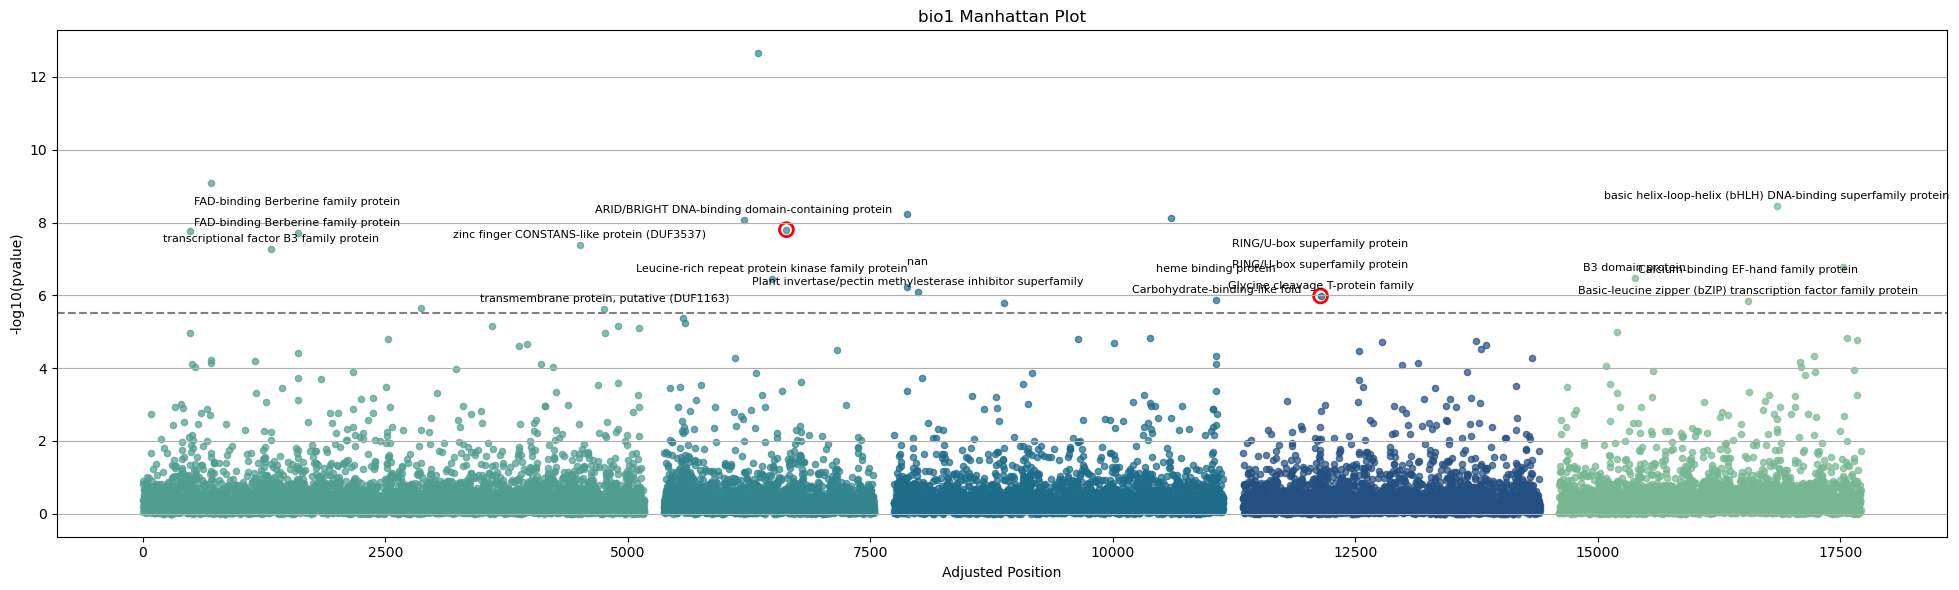

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Significance threshold
threshold_value = 0.05 / len(wza_lfmm)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Define colors for each chromosome
colors = sns.color_palette("crest", n_colors=5)

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7, 
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
        s=20
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')
plt.grid(axis='y')

# Add a threshold line for significance
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Identify significant blocks in wza_lfmm
significant_blocks = df[df['-log10(pvalue)'] >= threshold]

# Merge significant blocks with the annotation dataframe based on chrom_pos and block
annotated_blocks = significant_blocks.merge(small, left_on='chrom_pos', right_on='block', how='inner')

# Annotate the significant points with 'description1' and space annotations vertically
for chrom_pos, group in annotated_blocks.groupby('chrom_pos'):
    # Sort the group to ensure consistent spacing
    group = group.sort_values(by='description1')
    vertical_offset = 0  # Start the vertical offset at 0
    for i, row in group.iterrows():
        plt.annotate(
            row['description1'], 
            (row['adjusted_position'], row['-log10(pvalue)']),
            textcoords="offset points",  # Specify the offset point for the text
            xytext=(0, 5 + vertical_offset),  # Increment vertical offset for each annotation
            ha='center',    # Align horizontally to center
            fontsize=8,
            color='black'
        )
        vertical_offset += 15  # Increase vertical offset for the next annotation

# Highlight specific genes if needed
genes = ['2_1265', '4_801']  # List of specific genes to highlight
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',
            linewidth=2,
            facecolor='none',
            s=100,
            label=f'Gene {gene}'
        )

plt.tight_layout()
plt.show()


/tmp/ipykernel_3972733/1450895180.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


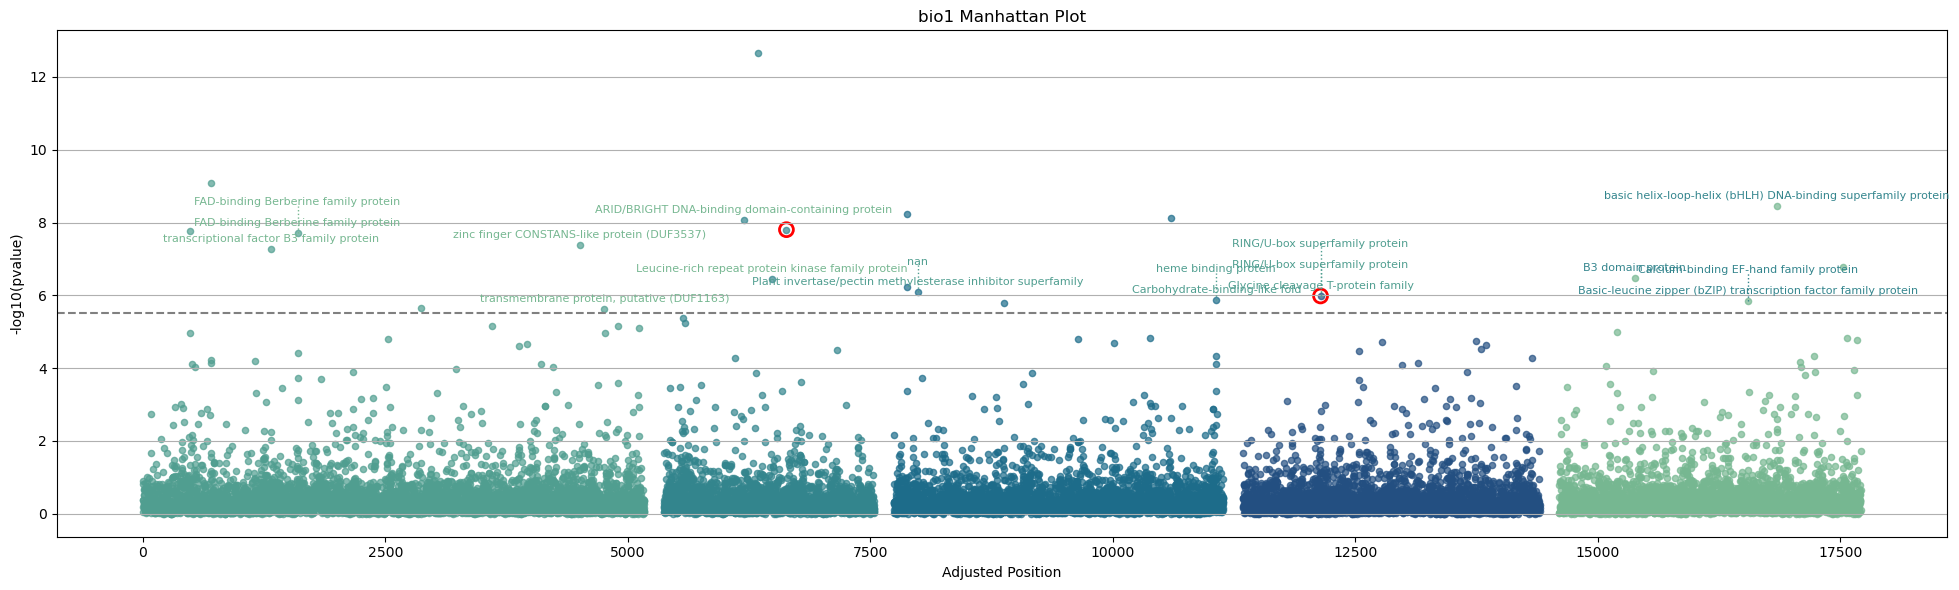

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Significance threshold
threshold_value = 0.05 / len(wza_lfmm)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Define colors for each chromosome or block
colors = sns.color_palette("crest", n_colors=len(df['chromosome'].unique()))  # Assign a unique color per chromosome

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7, 
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
        s=20
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')
plt.grid(axis='y')

# Add a threshold line for significance
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Identify significant blocks in wza_lfmm
significant_blocks = df[df['-log10(pvalue)'] >= threshold]

# Merge significant blocks with the annotation dataframe based on chrom_pos and block
annotated_blocks = significant_blocks.merge(small, left_on='chrom_pos', right_on='block', how='inner')

# Annotate the significant points with 'description1', space annotations, and color-code them
for chrom_pos, group in annotated_blocks.groupby('chrom_pos'):
    group = group.sort_values(by='description1')
    vertical_offset = 0  # Start the vertical offset at 0
    
    # Color for this block
    color = colors[chromosome_offsets[group['chromosome'].iloc[0]] % len(colors)]

    for i, row in group.iterrows():
        # Add the annotation
        plt.annotate(
            row['description1'], 
            (row['adjusted_position'], row['-log10(pvalue)']),
            textcoords="offset points",  
            xytext=(0, 5 + vertical_offset),  # Offset vertically for each annotation
            ha='center',
            fontsize=8,
            color=color  # Use the same color for annotation
        )
        
        # Draw a line connecting the point to the annotation
        plt.plot(
            [row['adjusted_position'], row['adjusted_position']],  # X coordinates (same X)
            [row['-log10(pvalue)'], row['-log10(pvalue)'] + (vertical_offset / 20)],  # Y coordinates
            color=color, linewidth=1, linestyle='dotted'
        )
        
        vertical_offset += 15  # Increase vertical offset for the next annotation

# Highlight specific genes if needed
genes = ['2_1265', '4_801']  # List of specific genes to highlight
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',
            linewidth=2,
            facecolor='none',
            s=100,
            label=f'Gene {gene}'
        )

plt.tight_layout()
plt.show()


/tmp/ipykernel_3972733/3243139160.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


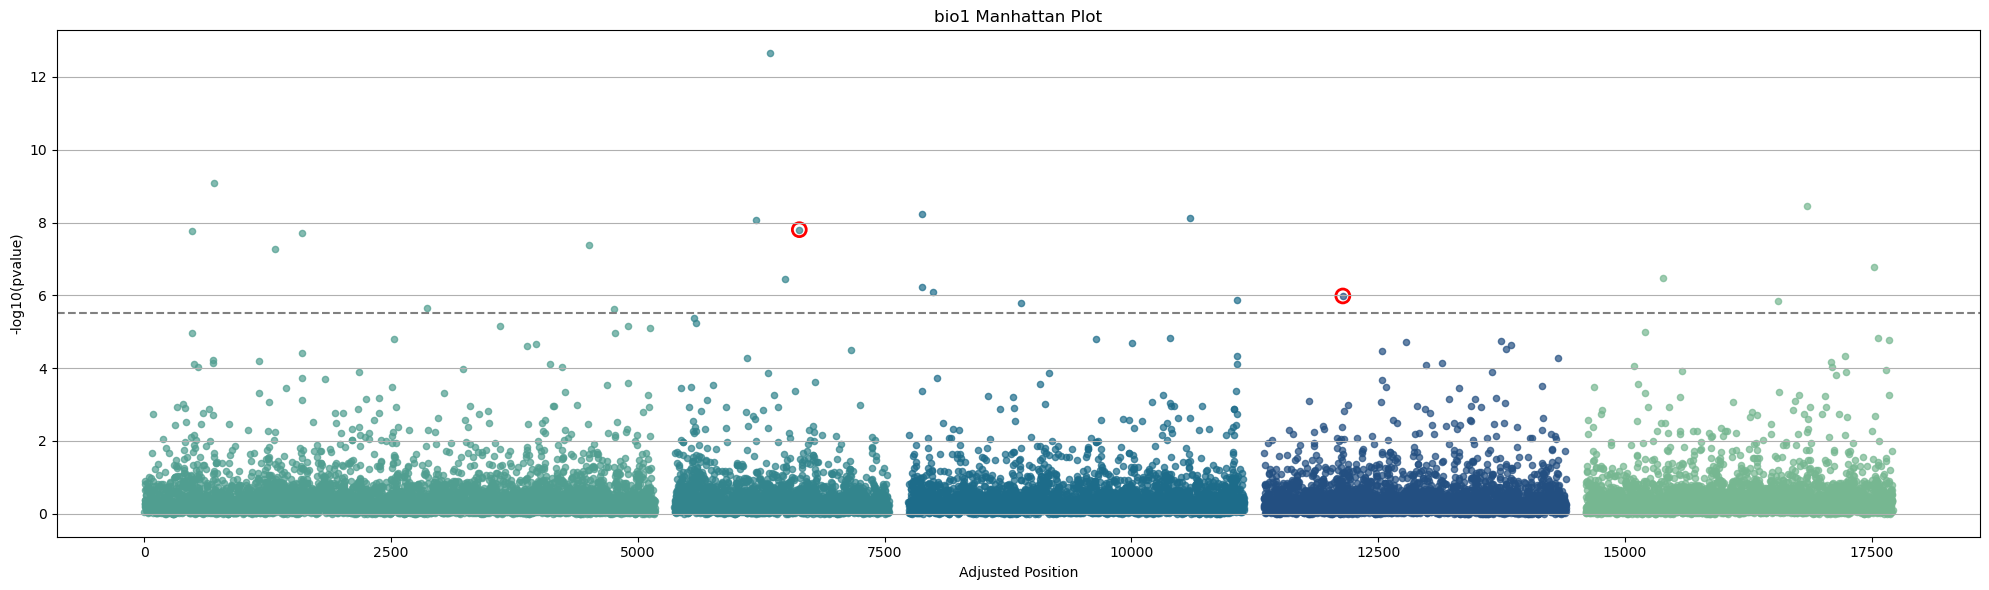

In [27]:
threshold_value = 0.05 / len(wza_lfmm)
biovar='bio1'
#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = wza_lfmm[['Z_pVal','pos','chrom']].copy()


# Parsing chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

colors = sns.color_palette("crest", n_colors = 5)

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Buffer to prevent overlap

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Normalize sizes for better visualization
size_transform = 2  # Adjust this factor as needed


# Create a color map based on `n_est`
#df['color'] = df['n_est'].map(lambda x: cmap(norm(x)))

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7,  # Transparency for better visibility
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
            s= 20)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')  # Set the title
plt.grid(axis='y')


#genes = ['2_199', '3_2730', '5_2244']
genes = ['2_1265', '4_801']
# Add circles around the specific genes
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',  # Color of the edge of the circle
            linewidth=2,      # Width of the edge line
            facecolor='none', # Facecolor of the circle (None means transparent)
            s=100,            # Size of the circle
            label=f'Gene {gene}'
        )
# Create a legend for the number of estimated lineages
#handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(n)), markersize=10, label=f'Lineages {n}') for n in sorted(n_est_unique)]
#plt.legend(handles=handles, title="Estimated Lineages", bbox_to_anchor=(1.05, 1), loc='upper left')

# Threshold line
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Show the plot
plt.tight_layout()
plt.show()


In [51]:
wza_kendall = pd.read_csv('wza_kendalltau_results_bio1.csv').reset_index()

In [52]:
wza_kendall['chrom'] = wza_kendall['gene'].str.split('_').str[0].astype(int)
wza_kendall['pos'] = wza_kendall['gene'].str.split('_').str[1].astype(int)

In [53]:
threshold_value = 0.05 / len(wza_kendall)

In [54]:
wza_kendall[wza_kendall['Z_pVal']< threshold_value].to_csv('wza_kendall_significant_blocks.csv',index=None)

In [ ]:
wza_kendall

In [ ]:
gene - the name of the window
SNPs - the number of SNPs in this window
hits - the number of SNPs in the 99th percentile (not used for anything, just good to know)
Z - the Z score calculated for the gene
top_candidate_p - the result of the top-candidate method of Yeaman et al (2016 - Science)
LA - an indicator of whether the gene is causal for local adaptation
position - the average position of all SNPs in the window
Z_pVal - the p-value of the Z score (This is the WZA score)


/tmp/ipykernel_894693/1995763944.py:1: RuntimeWarning: divide by zero encountered in log10
  observed_quantiles = -np.log10(np.sort(wza_kendall['Z_pVal'].values))


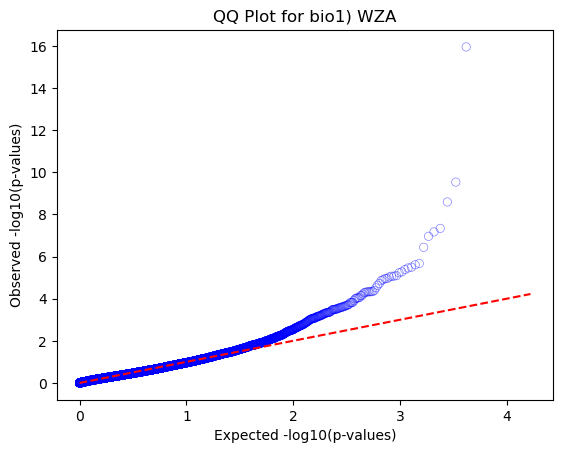

In [48]:
observed_quantiles = -np.log10(np.sort(wza_kendall['Z_pVal'].values))

# Expected quantiles from the uniform distribution
expected_quantiles = -np.log10(np.linspace(1 / len(wza_kendall), 1, len(wza_kendall)))

# QQ plot
sns.scatterplot(x = expected_quantiles, y = observed_quantiles, edgecolor='b', facecolor='none', alpha=0.5)
plt.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], 'r--')

plt.xlabel("Expected -log10(p-values)")
plt.ylabel("Observed -log10(p-values)")
plt.title(f'QQ Plot for {biovar}) WZA')

plt.show()

/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_894693/2348446781.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


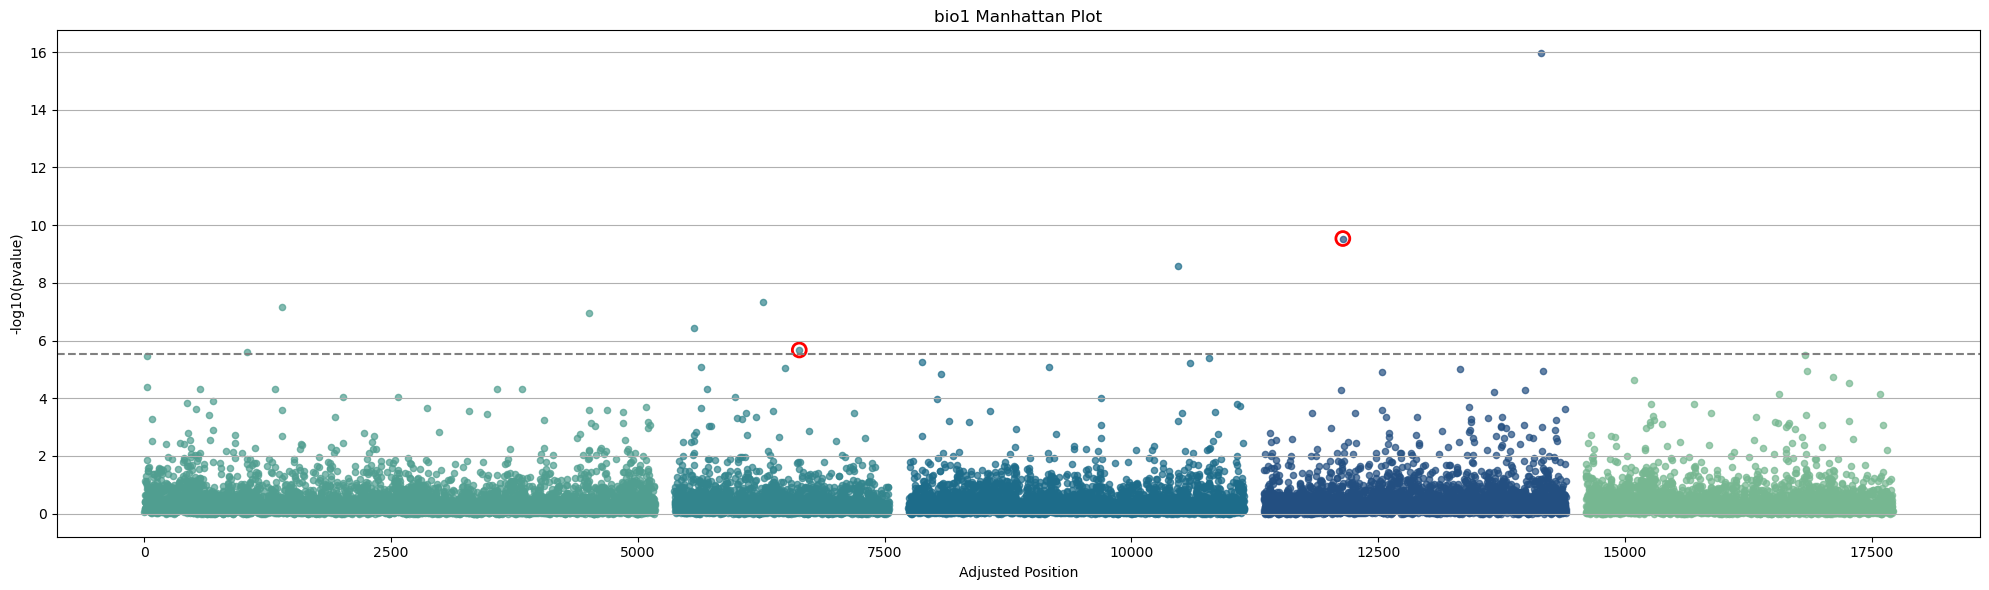

In [57]:
threshold_value = 0.05 / len(wza_kendall)
biovar='bio1'
#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = wza_kendall[['Z_pVal','pos','chrom']].copy()


# Parsing chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

colors = sns.color_palette("crest", n_colors = 5)

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Buffer to prevent overlap

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Normalize sizes for better visualization
size_transform = 2  # Adjust this factor as needed


# Create a color map based on `n_est`
#df['color'] = df['n_est'].map(lambda x: cmap(norm(x)))

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7,  # Transparency for better visibility
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
            s= 20)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')  # Set the title
plt.grid(axis='y')

# Create a legend for the number of estimated lineages
#handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(n)), markersize=10, label=f'Lineages {n}') for n in sorted(n_est_unique)]
#plt.legend(handles=handles, title="Estimated Lineages", bbox_to_anchor=(1.05, 1), loc='upper left')
#genes = ['2_199', '3_2730', '5_2244']
genes = ['2_1265', '4_801']
# Add circles around the specific genes
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',  # Color of the edge of the circle
            linewidth=2,      # Width of the edge line
            facecolor='none', # Facecolor of the circle (None means transparent)
            s=100,            # Size of the circle
            label=f'Gene {gene}'
        )


# Threshold line
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_3175312/2368688080.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


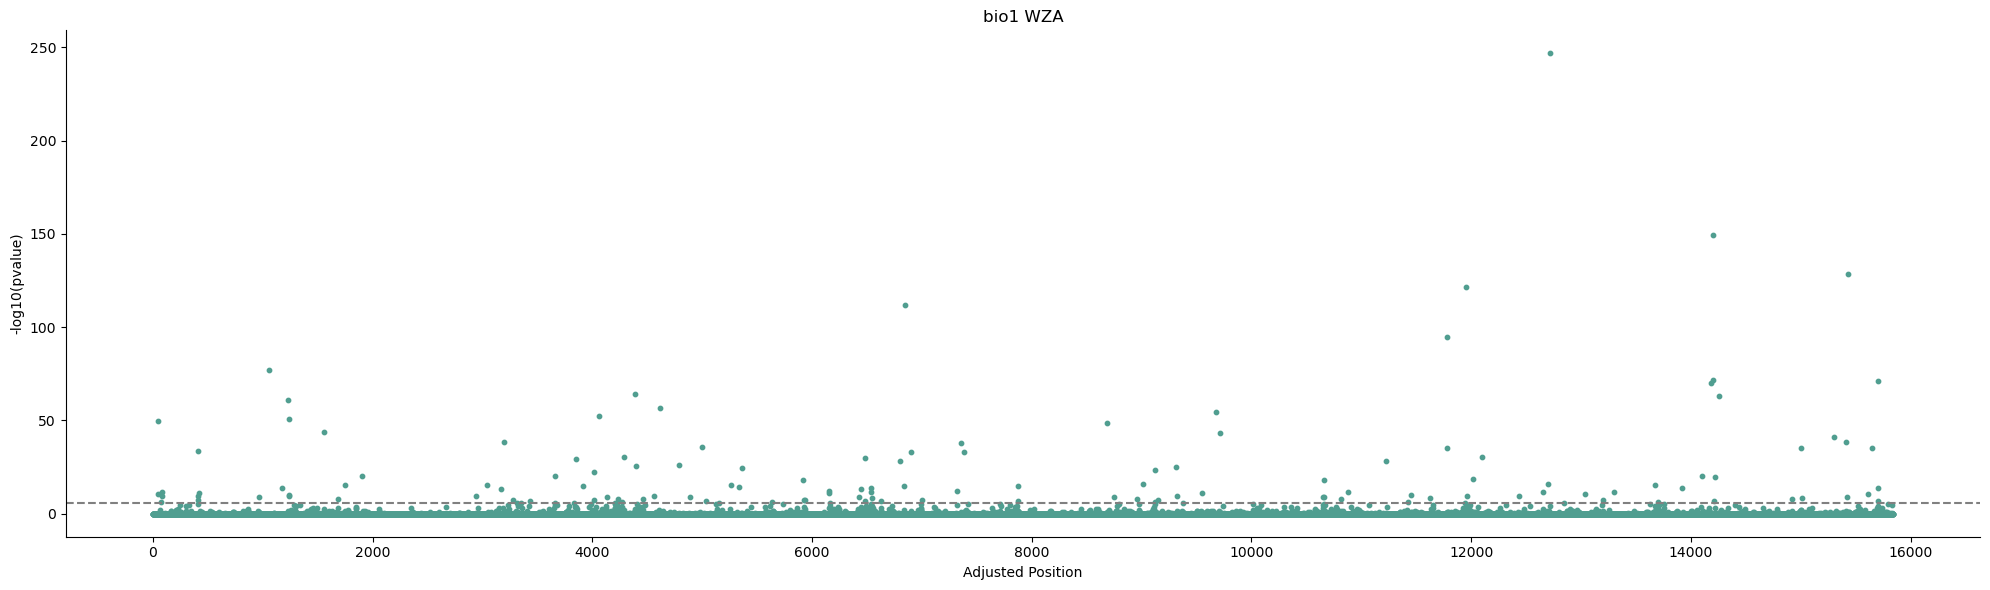

In [50]:
threshold_value = 0.05 / len(wza)
biovar='bio1'
#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = wza[['top_candidate_p', 'index']].copy()

colors = sns.color_palette("crest", n_colors = 5)

# Parsing chromosome number and position
df['chromosome'] = 1
df['position'] = df['index']
df['-log10(pvalue)'] = -np.log10(df['top_candidate_p'])

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
#plt.title('Manhattan Plot')
#plt.grid(axis='y')
#plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)
# Threshold line (optional)
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')
plt.title(f'{biovar} WZA')  # Set the title

# Show the plot
plt.tight_layout()
plt.savefig(f'manhattan_{biovar}.png')
plt.show()